In [24]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import sys
sys.path.insert(0, '../')

from TextLabeller import *

%matplotlib inline

In [25]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [26]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
#     rfc = RandomForestClassifier()
    from sklearn.naive_bayes import GaussianNB
    rfc = GaussianNB()


    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return rfc, test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [27]:
METRIC = "levenshtein"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

# labelled_real=f'labelled_real_metrics_{METRIC}.csv'
# labelled_fake=f'labelled_fake_metrics_{METRIC}.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

combined_data = real_data.append(fake_data)

y = combined_data['label'].values

combined_data.tail(10)

,index,text,novelty,diversity,label
11045,11045,new ship plans brought the mention of the peop...,0.135135,0.150754,0
11046,11046,"mr as added : `` i don ' t do for that , tired...",0.112195,0.136842,0
11047,11047,when the asian market may be is known that he ...,0.101523,0.123188,0
11048,11048,other is happening - but i thought he ' s made...,0.113300,0.141553,0
11049,11049,over the city and this step is been a 21st & h...,0.113636,0.139394,0
11050,11050,"while energy producers grew away five , from t...",0.126582,0.134503,0
11051,11051,`` mid - 1999 pledge to `` is difficult to be ...,0.145907,0.157895,0
11052,11052,the former u .,0.051282,0.071429,0
11053,11053,s & e - ranging index in a middle - dealing sh...,0.092715,0.123188,0
11054,11054,just often see elderly male services across il...,0.115385,0.143519,0


## Classify using both novelty and diversity

input dimensions: 21840 | output dimensions: 21840
x_train dimensions: 19656 | y_train dimensions: 19656
x_test dimensions: 2184 | y_test dimensions: 2184
             precision    recall  f1-score   support

          0       0.67      0.93      0.78      1070
          1       0.89      0.57      0.69      1114

avg / total       0.78      0.74      0.73      2184

0.7417582417582418
[[990  80]
 [484 630]]


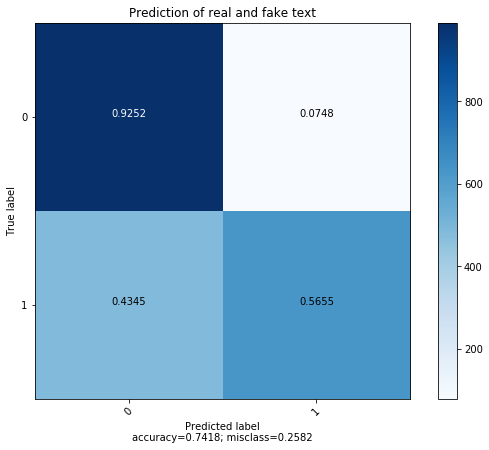

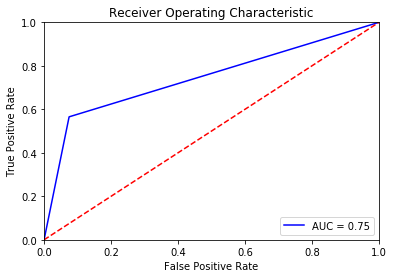

AttributeError: 'GaussianNB' object has no attribute 'estimators_'

In [28]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov, divs[ix]])

rfc, test_labels, y_preds = classify(x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

from sklearn.tree import export_graphviz

export_graphviz(rfc.estimators_[5],
                feature_names=['novelty', 'diversity'],
                class_names=['Fake','Real'],
                filled=True, precision=True, proportion=False,
                rounded=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'nov_div.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='nov_div.png')

## Classify using only novelty

input dimensions: 21840 | output dimensions: 21840
x_train dimensions: 19656 | y_train dimensions: 19656
x_test dimensions: 2184 | y_test dimensions: 2184
             precision    recall  f1-score   support

          0       0.51      0.87      0.64      1107
          1       0.51      0.14      0.22      1077

avg / total       0.51      0.51      0.43      2184

0.5105311355311355
[[967 140]
 [929 148]]


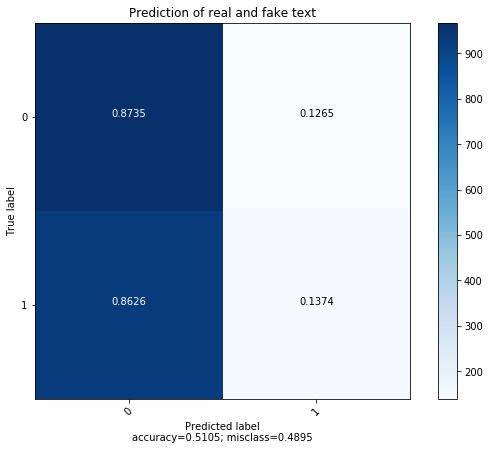

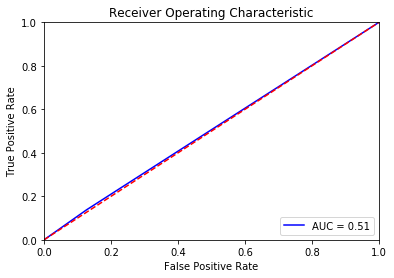

AttributeError: 'GaussianNB' object has no attribute 'estimators_'

In [29]:
novs = combined_data['novelty'].values

x = list()
for ix, nov in enumerate(novs):
    x.append([nov])

rfc, test_labels, y_preds = classify(x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

export_graphviz(rfc.estimators_[5],
                feature_names=['diversity'],
                class_names=['Fake','Real'],
                filled=True, precision=True, proportion=False,
                rounded=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'nov.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='nov.png')

## Classify using only diversity

input dimensions: 21840 | output dimensions: 21840
x_train dimensions: 19656 | y_train dimensions: 19656
x_test dimensions: 2184 | y_test dimensions: 2184
             precision    recall  f1-score   support

          0       0.72      0.92      0.81      1131
          1       0.88      0.61      0.72      1053

avg / total       0.79      0.77      0.76      2184

0.7696886446886447
[[1041   90]
 [ 413  640]]


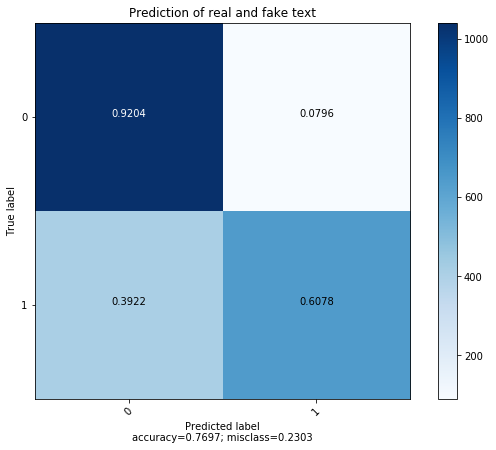

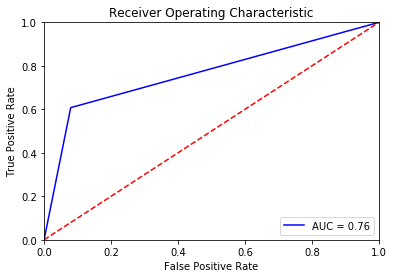

AttributeError: 'GaussianNB' object has no attribute 'estimators_'

In [30]:
divs = combined_data['diversity'].values

x = list()
for ix, div in enumerate(divs):
    x.append([div])

rfc, test_labels, y_preds = classify(x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

export_graphviz(rfc.estimators_[5],
                feature_names=['diversity'],
                class_names=['Fake','Real'],
                filled=True, precision=True, proportion=False,
                rounded=True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'div.png', '-Gdpi=600'])

# from IPython.display import Image
# Image(filename='div.png')

## Classify with both novelty and diversity: test with unseen data (TBD)

In [8]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])
    
# # unlabelled_real='unlabelled_real_text.csv' # not really unlabelled, just missing novelty and diversity
# # unlabelled_fake='unlabelled_fake_text.csv' # same here

# # _real_data = pd.read_csv(unlabelled_real)
# # _fake_data = pd.read_csv(unlabelled_real)

# # _combined_data = _real_data.append(_fake_data)

# # x_train, test, train_labels, test_labels = x,  , y, _combined_data['label'].values

# x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = 0.10)

# print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
# print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
# print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

# import xgboost as xgb
# model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, 
#                           reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
# model.fit(x_train, train_labels) 


# # # Initialize classifier
# # rfc = RandomForestClassifier()

# # # Train classifier
# # model = rfc.fit(x_train, train_labels)

# # Make predictions
# preds = rfc.predict(test)

# # Evaluate model
# from sklearn.metrics import classification_report, accuracy_score
# print(classification_report(test_labels, preds))
# print(accuracy_score(test_labels, preds))